## Loading Data From Torchvision

In [ ]:
import torch, torchvision

In [ ]:
image_path = './'

image_set = torchvision.datasets.CelebA( image_path, split = "Train", target_type="attr", download = True )

Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=7dc8c9bb-7fe3-42b6-a150-2150e56da570
To: /content/celeba/img_align_celeba.zip
100%|██████████| 1.44G/1.44G [00:24<00:00, 59.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pblRyaVFSWGxPY0U
To: /content/celeba/list_attr_celeba.txt
100%|██████████| 26.7M/26.7M [00:00<00:00, 40.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS
To: /content/celeba/identity_CelebA.txt
100%|██████████| 3.42M/3.42M [00:00<00:00, 24.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pbThiMVRxWXZ4dU0
To: /content/celeba/list_bbox_celeba.txt
100%|██████████| 6.08M/6.08M [00:00<00:00, 36.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pd0FJY3Blby1HUTQ
To: /content/celeba/list_landmarks_align_celeba.txt
100

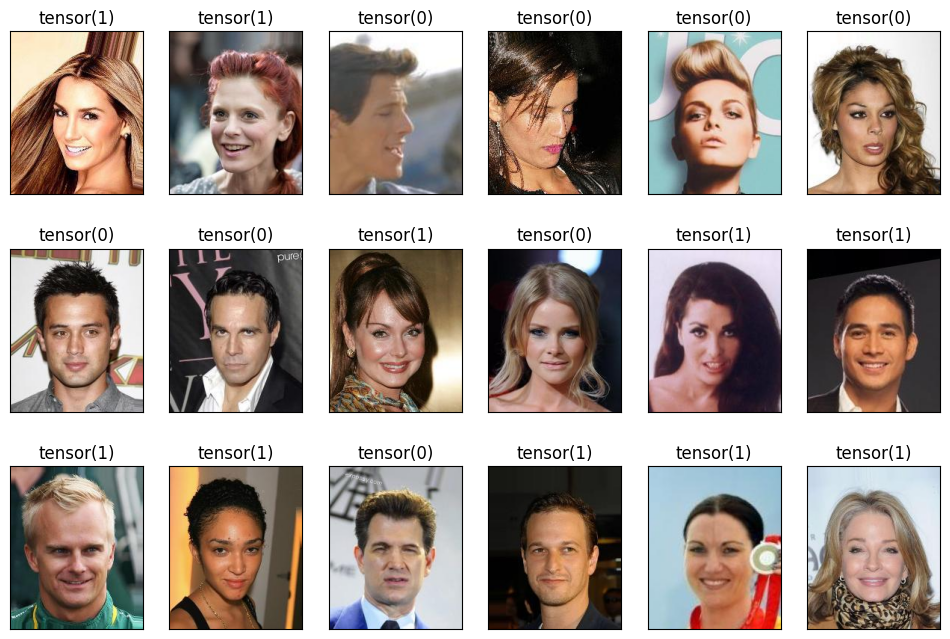

In [ ]:
from itertools import islice
import matplotlib.pyplot as plt
import PIL.Image as img

fig = plt.figure(figsize=(12,8))

for idx,(images,attr) in islice(enumerate(image_set),18):
  ax = fig.add_subplot( 3, 6 , idx+1 )
  ax.set_yticks([]), ax.set_xticks([])
  ax.imshow(images)
  ax.set_title(attr[31])
plt.show()

In [ ]:
digis = torchvision.datasets.MNIST(image_path, download = True )

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16031618.96it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 505576.79it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4462118.75it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5321376.75it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
isinstance(digis, torchvision.datasets.MNIST)

True

In [ ]:
print(next(iter(digis)))

(<PIL.Image.Image image mode=L size=28x28 at 0x7BEB1289E440>, 5)


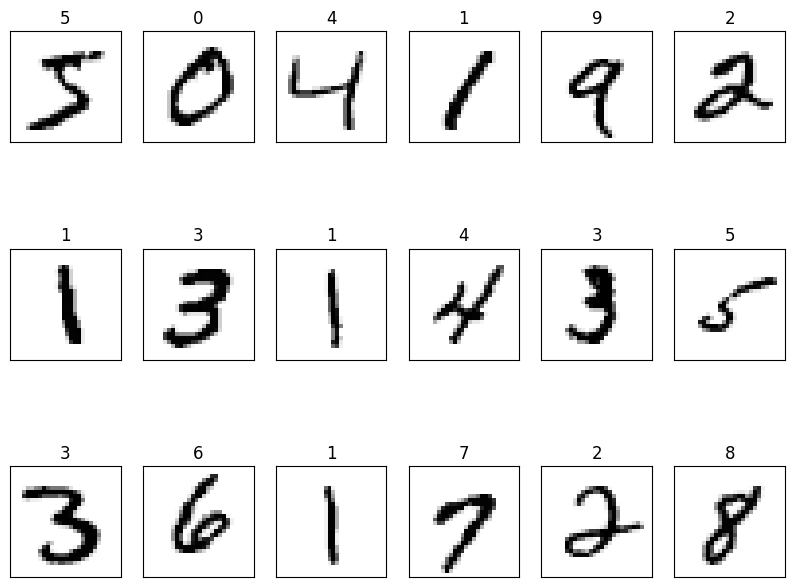

In [ ]:
fig = plt.figure(figsize=(10,8))
for idx,(image,attr) in islice(enumerate(digis),18):
  ax = fig.add_subplot(3,6,idx+1)
  ax.imshow(image,cmap="Greys")
  ax.set_yticks([])
  ax.set_xticks([])
  ax.set_title(attr)

plt.show()

## Basic NN

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [105]:
def func(x):
  return x + np.random.normal()*0.5

In [106]:
x = np.arange(10, dtype = "float32")
y = np.array( [ func(x_) for x_ in x ], dtype="float32" )

In [107]:
x = x.reshape(-1,1)

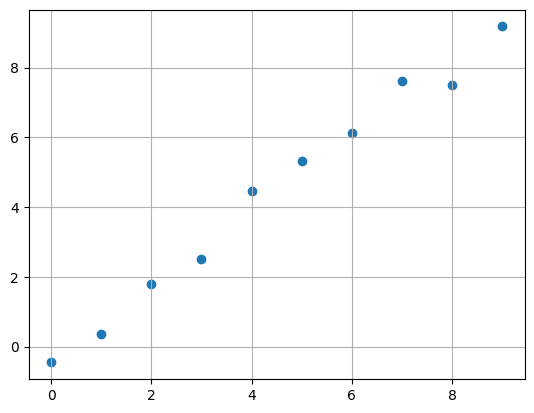

In [108]:
plt.scatter(x,y)
plt.grid()
plt.show()

In [33]:
import torch
from torch import nn
from torch.utils.data import TensorDataset 
from torch.utils.data import DataLoader 

In [109]:
x = ( x - x.mean() ) / x.std()
x_train = torch.from_numpy( x )
y_train = torch.from_numpy( y )

In [110]:
td_train = TensorDataset( x_train, y_train )

In [111]:
dl_train = DataLoader(batch_size=1, dataset=td_train, shuffle=True )

In [112]:
torch.manual_seed(0)
w = torch.randn(1)
w.requires_grad = True
b = torch.zeros(1, requires_grad = True )

def model( xb ):
    return ( xb @ w + b )

def loss_f( y_hat, y_true ):
    return( (y_hat - y_true).pow(2).mean() )

In [115]:
lr = 0.001
n_epochs = 200
log_epochs = 40

for e in range(n_epochs):
    for x_batch, y_batch in dl_train:
        predict = model(x_batch)
        loss = loss_f( predict, y_batch )
        loss.backward()
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_()
    if e % log_epochs == 0:
        print(f"Loss: {loss}")

Loss: 0.002843943191692233
Loss: 0.0036833647172898054
Loss: 0.30198168754577637
Loss: 0.10916242003440857
Loss: 0.30198168754577637


In [122]:
x_test = np.arange(10, dtype="float32").reshape(-1,1)

In [123]:
x_test = torch.from_numpy(x_test)

In [127]:
y_test = model(x_test).detach().numpy()

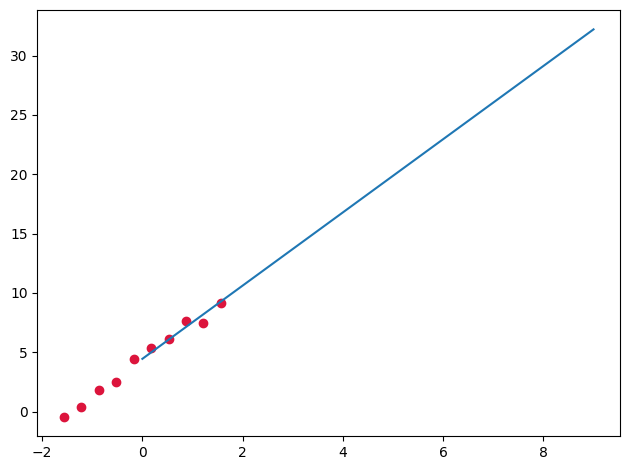

In [136]:
plt.plot(x_test,y_test)
plt.scatter(x,y, color="crimson")
plt.tight_layout()
plt.show()

## Using torch.nn & torch.optim modules

In [137]:
import torch.nn as nn

In [144]:
input_size = 1
output_size = 1
loss = nn.MSELoss( reduction="mean" )
model = nn.Linear( input_size, output_size )
optim = torch.optim.SGD( lr = 0.01, params = model.parameters() )

Z:\python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [149]:
pred = model( x_batch )
pred[:,0]

tensor([-0.3905], grad_fn=<SelectBackward0>)

In [160]:
for e in range(n_epochs):
    for x_batch, y_batch in dl_train:
        
        pred = model( x_batch )[:,0]
        cost = loss( pred, y_batch )
        cost.backward()
        optim.step()
        optim.zero_grad()
        
    if e % log_epochs == 0:
        print(cost.item())
        

0.10630562156438828
0.25412002205848694
0.002983646932989359
0.003052172716706991
0.004267681855708361


## On Iris Dataset

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [2]:
iris = load_iris()

In [3]:
X = iris.data

In [4]:
y = iris.target

In [36]:
# DONT USE STARTIFY !
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=0, stratify=y )

In [8]:
X_train = ( X_train - np.mean(X_train) ) / np.std( X_train )

In [11]:
X_train = torch.from_numpy( X_train ).float()
y_train = torch.from_numpy( y_train )

In [14]:
td_train = TensorDataset( X_train, y_train )

In [17]:
batch_size = 2
torch.manual_seed(0)
dl_train = DataLoader( td_train, batch_size=batch_size, shuffle=True )

In [18]:
class Model( nn.Module ):
    def __init__( self, input_size, hidden_size, output_size ):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    def forward( self, x ):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

In [19]:
input_size = X_train.shape[1]
hidden_size = 16
output_size = 3
model = Model( input_size, hidden_size, output_size )

In [20]:
lr = 0.001
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr = lr)

Z:\python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
n_epochs  = 100
loss_hist = [0] * n_epochs
acc_hist  = [0] * n_epochs

In [22]:
for e in range(n_epochs):
    for x_train_batch, y_train_batch in dl_train:
        pred = model( x_train_batch )
        cost = loss( pred, y_train_batch.long() ) 
        cost.backward()
        optim.step()
        optim.zero_grad()
        loss_hist[e] += cost.item() * y_train_batch.size(0) 
        is_correct    = (torch.argmax( pred, axis = 1 ) == y_train_batch ).float()
        acc_hist[e]  += is_correct.sum()
        # print(loss_hist[e])
    acc_hist[e] /= len(dl_train.dataset)
    loss_hist[e] /= len(dl_train.dataset)

In [25]:
import matplotlib.pyplot as plt

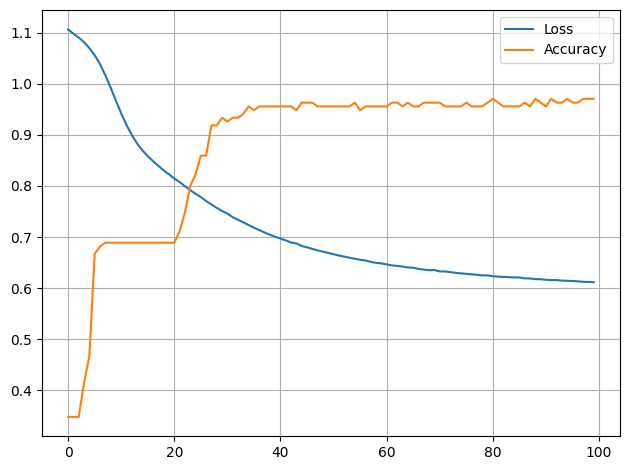

In [335]:
plt.plot(range(n_epochs),loss_hist, label = "Loss")
plt.plot(range(n_epochs),acc_hist, label = "Accuracy")
plt.tight_layout()
plt.legend( loc = "best" )
plt.grid()
plt.show()

In [27]:
path = "iris_nn.pt"
torch.save(model, path)

In [28]:
loaded = torch.load( path )

In [30]:
loaded.eval

<bound method Module.eval of Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)>

In [37]:
X_test_normalized =  torch.from_numpy(( X_test - np.mean( X_test ) ) / np.std(X_test )).float()

In [61]:
y_test = torch.from_numpy(y_test)

In [62]:
y_pred = loaded(X_test_normalized)

In [67]:
acc = ( torch.argmax(y_pred, axis = 1) == y_test ).float().mean()

In [75]:
torch.save(loaded.state_dict(), "iris_classifier")

In [76]:
model2 = Model( input_size, hidden_size, output_size)

In [77]:
model2.load_state_dict( torch.load("iris_classifier") )

<All keys matched successfully>

## Choosing Activation Functions

In [ ]:
'''
    * The sigmoid activation function could be problematic if our weights
    are more likely to be negative than positive. Thus, to impede the chance
    of the neural network being slow, people tend to use other activation 
    functions for hidden layers.

    * One of the concerns about sigmoid, also, is its output does not show the 
    probability of a sample to belong to a certain class. So, for multiclassification
    problems, we can use softmax. Softmax is considered as a generlization of the sigmoid.

    * There is one other essential activation function: tanh. Its advantage
    can be interperted as its value range, which starts from -1 up to 1.

    * Gradient Vanishing : Once the activation function's derivative starts to get closer
    to zero, our learning speed will diminish correspondingly. To address this problem
    ReLU is used.
'''